In [54]:
import pandas as pd

# Load the dataset
file_path = '/content/expanded_cirrhosis.csv'
data = pd.read_csv(file_path)

In [55]:
# Display the first few rows of the dataset
print(data.head())

# Display the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Display data types of each column
print(data.dtypes)

# Summary statistics
print(data.describe())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

# Handling Missing Values

In [56]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Fill missing values with the mean of the respective column for numerical columns
data['Cholesterol'].fillna(data['Cholesterol'].mean(), inplace=True)
data['Copper'].fillna(data['Copper'].mean(), inplace=True)
data['Alk_Phos'].fillna(data['Alk_Phos'].mean(), inplace=True)
data['SGOT'].fillna(data['SGOT'].mean(), inplace=True)
data['Tryglicerides'].fillna(data['Tryglicerides'].mean(), inplace=True)
data['Platelets'].fillna(data['Platelets'].mean(), inplace=True)
data['Prothrombin'].fillna(data['Prothrombin'].mean(), inplace=True)
data['Stage'].fillna(data['Stage'].mean(), inplace=True)


# Fill missing values with the mode of the respective column for categorical columns
data['Drug'].fillna(data['Drug'].mode()[0], inplace=True)
data['Ascites'].fillna(data['Ascites'].mode()[0], inplace=True)
data['Hepatomegaly'].fillna(data['Hepatomegaly'].mode()[0], inplace=True)
data['Spiders'].fillna(data['Spiders'].mode()[0], inplace=True)

Missing values:
ID                 0
N_Days             0
Status             0
Drug             461
Age                0
Sex                0
Ascites          461
Hepatomegaly     461
Spiders          461
Edema              0
Bilirubin          0
Cholesterol      579
Albumin            0
Copper           472
Alk_Phos         461
SGOT             461
Tryglicerides    586
Platelets         46
Prothrombin        5
Stage             24
dtype: int64


In [57]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


## Check for duplicate values

In [58]:
# Check for duplicate rows based on 'ID' column
duplicate_ids = data['ID'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

# Remove duplicate rows based on 'ID' column
data = data.drop_duplicates(subset='ID')

Number of duplicate IDs: 1363


In [59]:
# Check if age values are within a reasonable range
age_outliers = data[(data['Age'] < 0) | (data['Age'] > 365 * 120)]  # Assuming age should be within 0 and 120 years
print(f"Age outliers:\n{age_outliers}")

Age outliers:
Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


In [60]:
# Validate categorical values and count invalid entries
valid_statuses = ['D', 'C', 'CL']
invalid_statuses = data[~data['Status'].isin(valid_statuses)]
count_invalid_statuses = invalid_statuses.shape[0]

valid_drugs = ['D-penicillamine', 'Placebo']
invalid_drugs = data[~data['Drug'].isin(valid_drugs)]
count_invalid_drugs = invalid_drugs.shape[0]

valid_sexes = ['M', 'F']
invalid_sexes = data[~data['Sex'].isin(valid_sexes)]
count_invalid_sexes = invalid_sexes.shape[0]

valid_binary = ['Y', 'N']
invalid_ascites = data[~data['Ascites'].isin(valid_binary)]
count_invalid_ascites = invalid_ascites.shape[0]

invalid_hepatomegaly = data[~data['Hepatomegaly'].isin(valid_binary)]
count_invalid_hepatomegaly = invalid_hepatomegaly.shape[0]

invalid_spiders = data[~data['Spiders'].isin(valid_binary)]
count_invalid_spiders = invalid_spiders.shape[0]

valid_edema = ['Y', 'N', 'S']
invalid_edema = data[~data['Edema'].isin(valid_edema)]
count_invalid_edema = invalid_edema.shape[0]

print(f"Invalid entries for Status: {count_invalid_statuses}")
if count_invalid_statuses > 0:
    print(invalid_statuses)

print(f"Invalid entries for Drug: {count_invalid_drugs}")
if count_invalid_drugs > 0:
    print(invalid_drugs)

print(f"Invalid entries for Sex: {count_invalid_sexes}")
if count_invalid_sexes > 0:
    print(invalid_sexes)

print(f"Invalid entries for Ascites: {count_invalid_ascites}")
if count_invalid_ascites > 0:
    print(invalid_ascites)

print(f"Invalid entries for Hepatomegaly: {count_invalid_hepatomegaly}")
if count_invalid_hepatomegaly > 0:
    print(invalid_hepatomegaly)

print(f"Invalid entries for Spiders: {count_invalid_spiders}")
if count_invalid_spiders > 0:
    print(invalid_spiders)

print(f"Invalid entries for Edema: {count_invalid_edema}")
if count_invalid_edema > 0:
    print(invalid_edema)


Invalid entries for Status: 0
Invalid entries for Drug: 0
Invalid entries for Sex: 0
Invalid entries for Ascites: 0
Invalid entries for Hepatomegaly: 0
Invalid entries for Spiders: 0
Invalid entries for Edema: 0


Status
C     232
D     161
CL     25
Name: count, dtype: int64


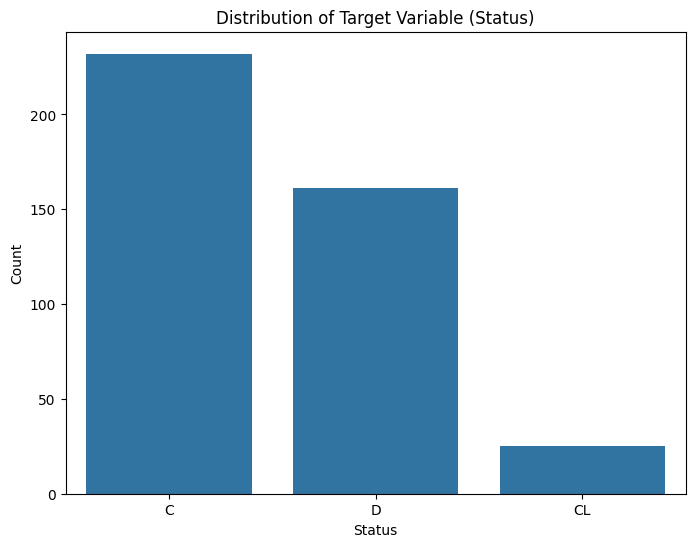

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Inspect the distribution of the target variable 'Status'
status_distribution = data['Status'].value_counts()
print(status_distribution)

# Visualize the distribution of the target variable 'Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=data, order=data['Status'].value_counts().index)
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

##Exploratory Data Analysis

In [62]:
# Display basic information about the dataset
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombin    

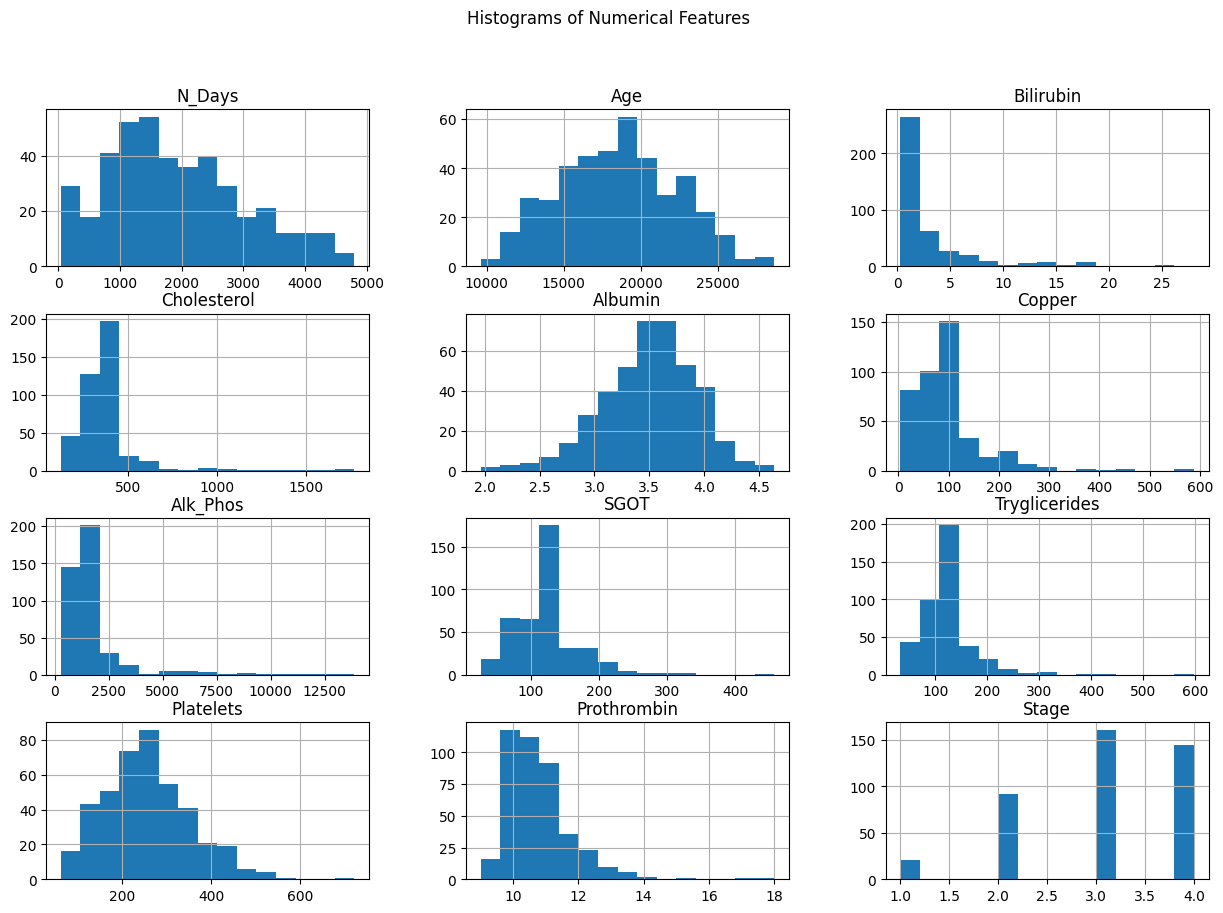

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Plot histograms for numerical columns
data[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

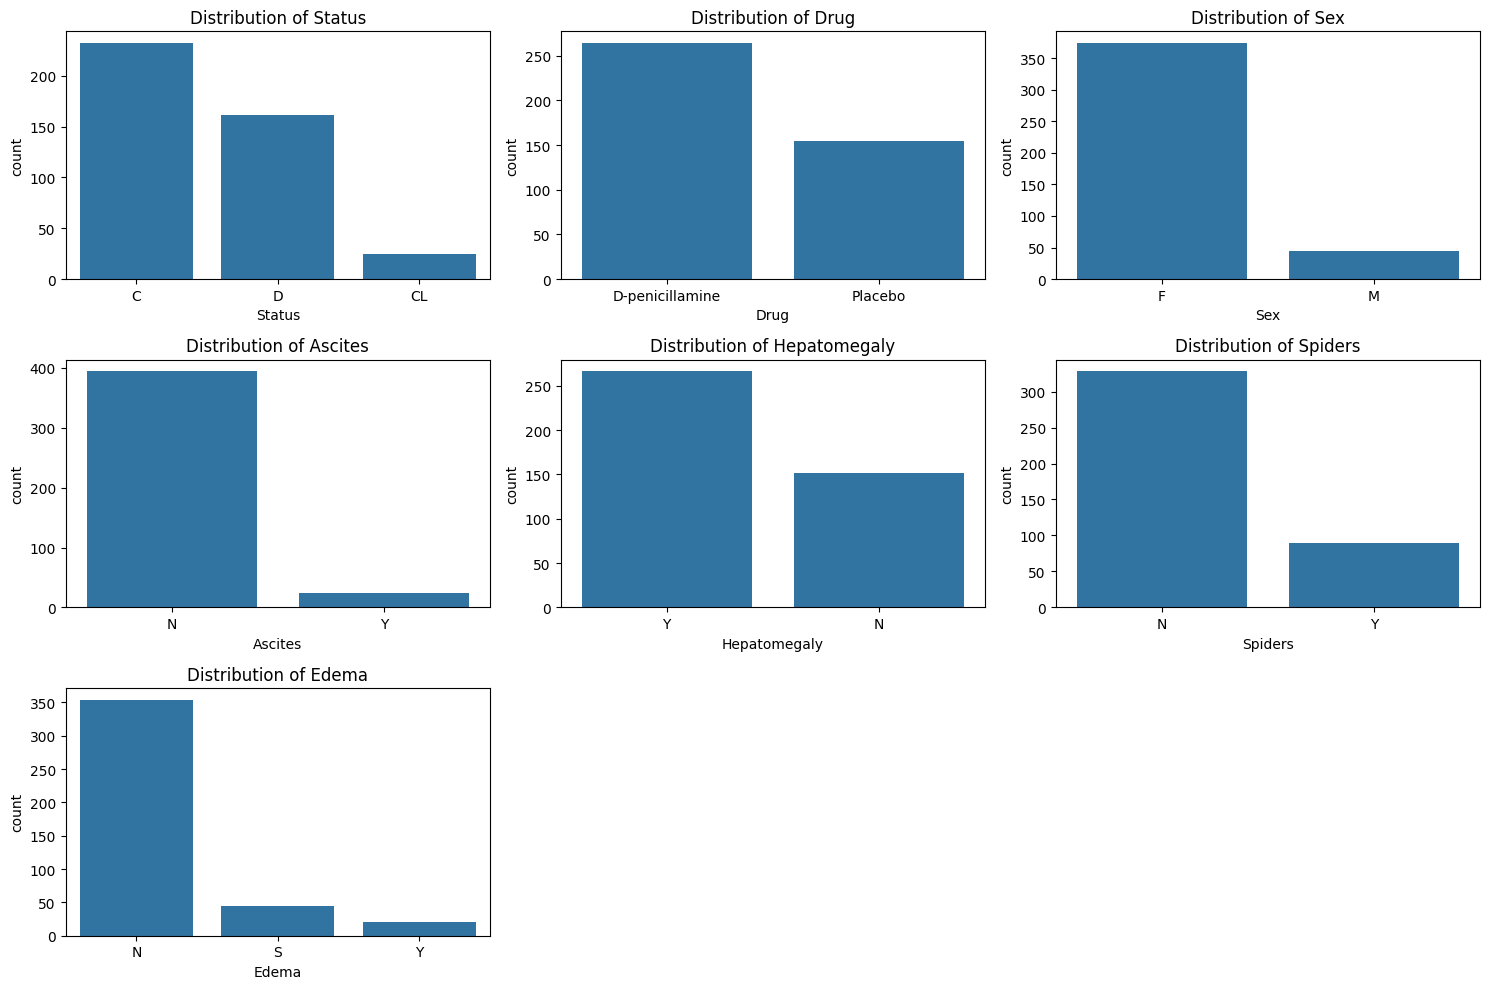

In [64]:
# List of categorical columns
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Plot count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

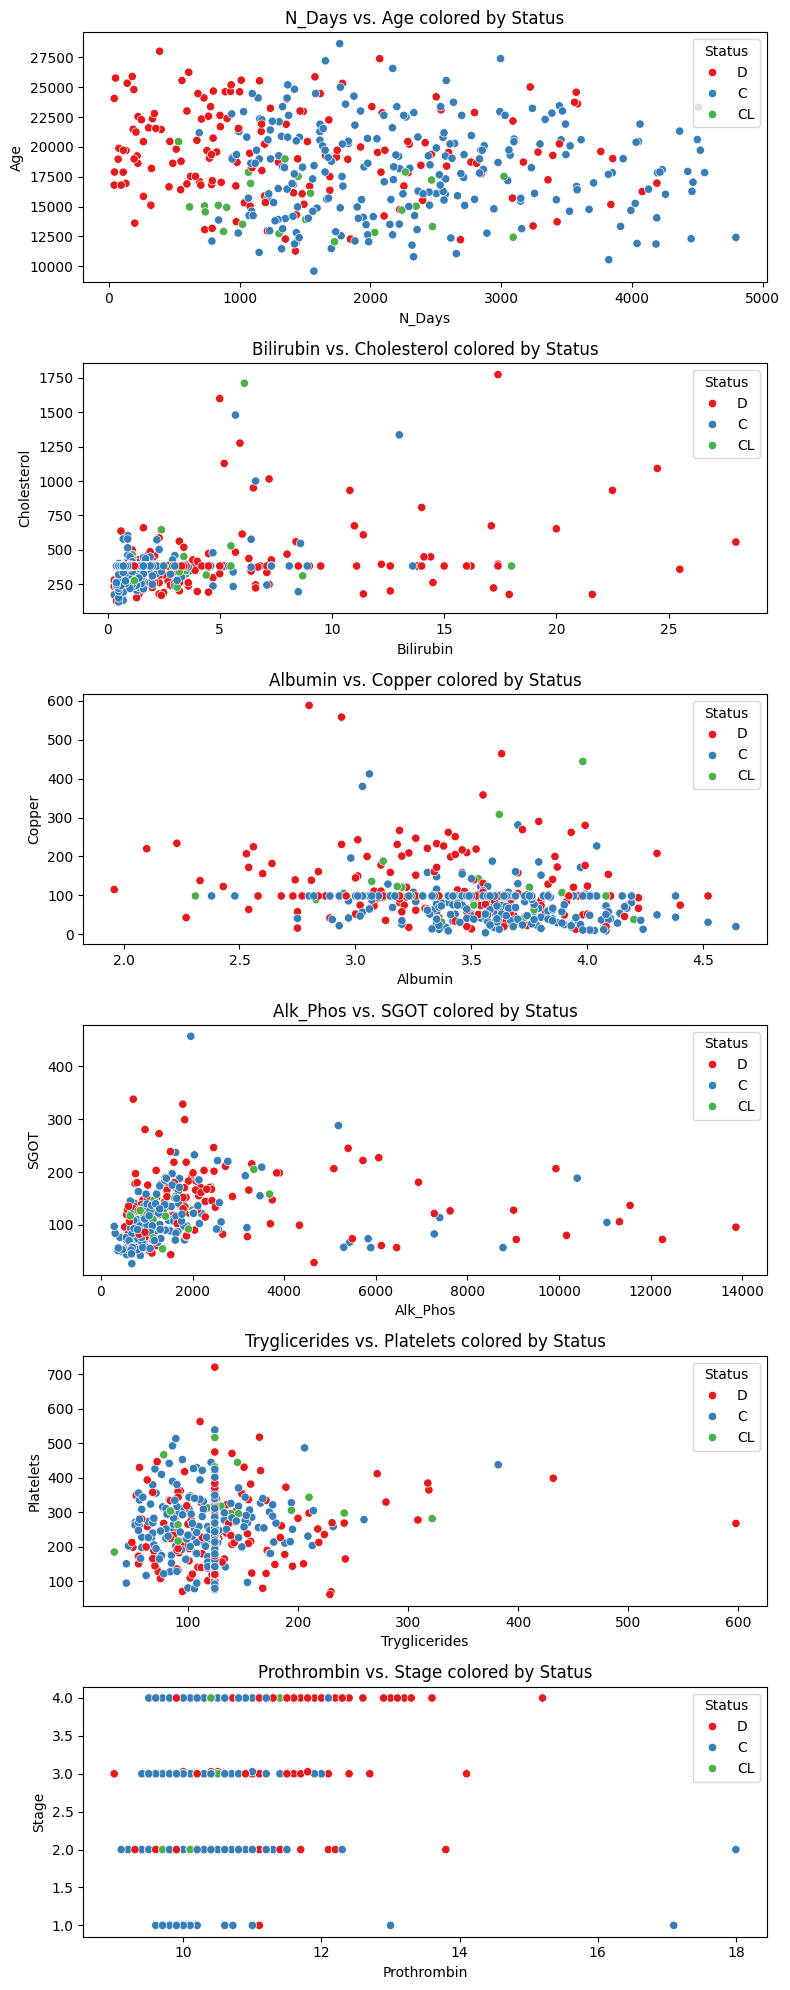

In [65]:
# Plot scatter plots for numerical columns against each other colored by the target variable 'Status'
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    if i % 2 == 0 and i+1 < len(numerical_cols):  # Pairing columns for scatter plot
        plt.subplot(6, 2, i + 1)
        sns.scatterplot(x=col, y=numerical_cols[i + 1], hue='Status', data=data, palette='Set1')
        plt.title(f'{col} vs. {numerical_cols[i + 1]} colored by Status')
plt.tight_layout()
plt.show()


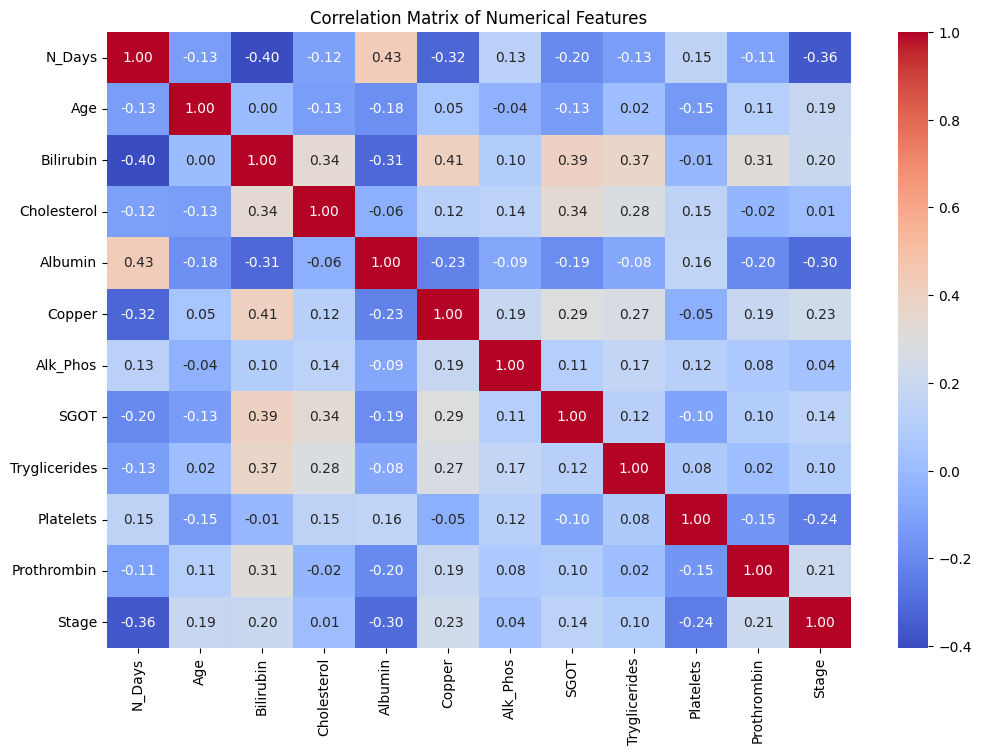

In [66]:
# Compute correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Status
C     232
D     161
CL     25
Name: count, dtype: int64


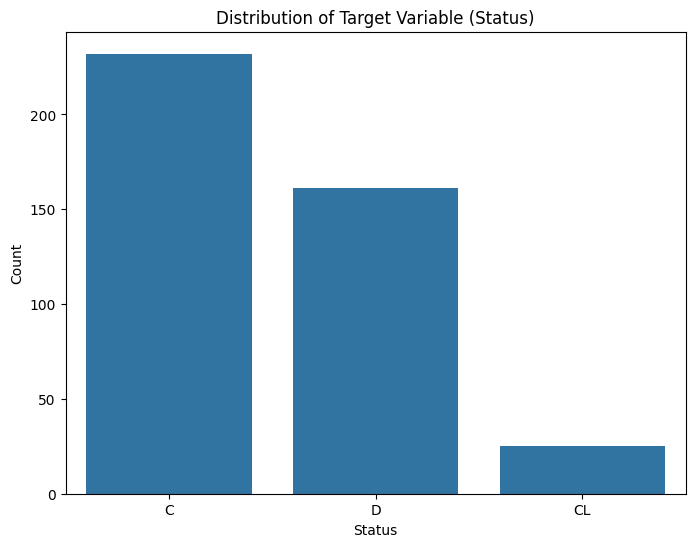

In [67]:
# Inspect the distribution of the target variable 'Status'
status_distribution = data['Status'].value_counts()
print(status_distribution)

# Visualize the distribution of the target variable 'Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=data, order=data['Status'].value_counts().index)
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

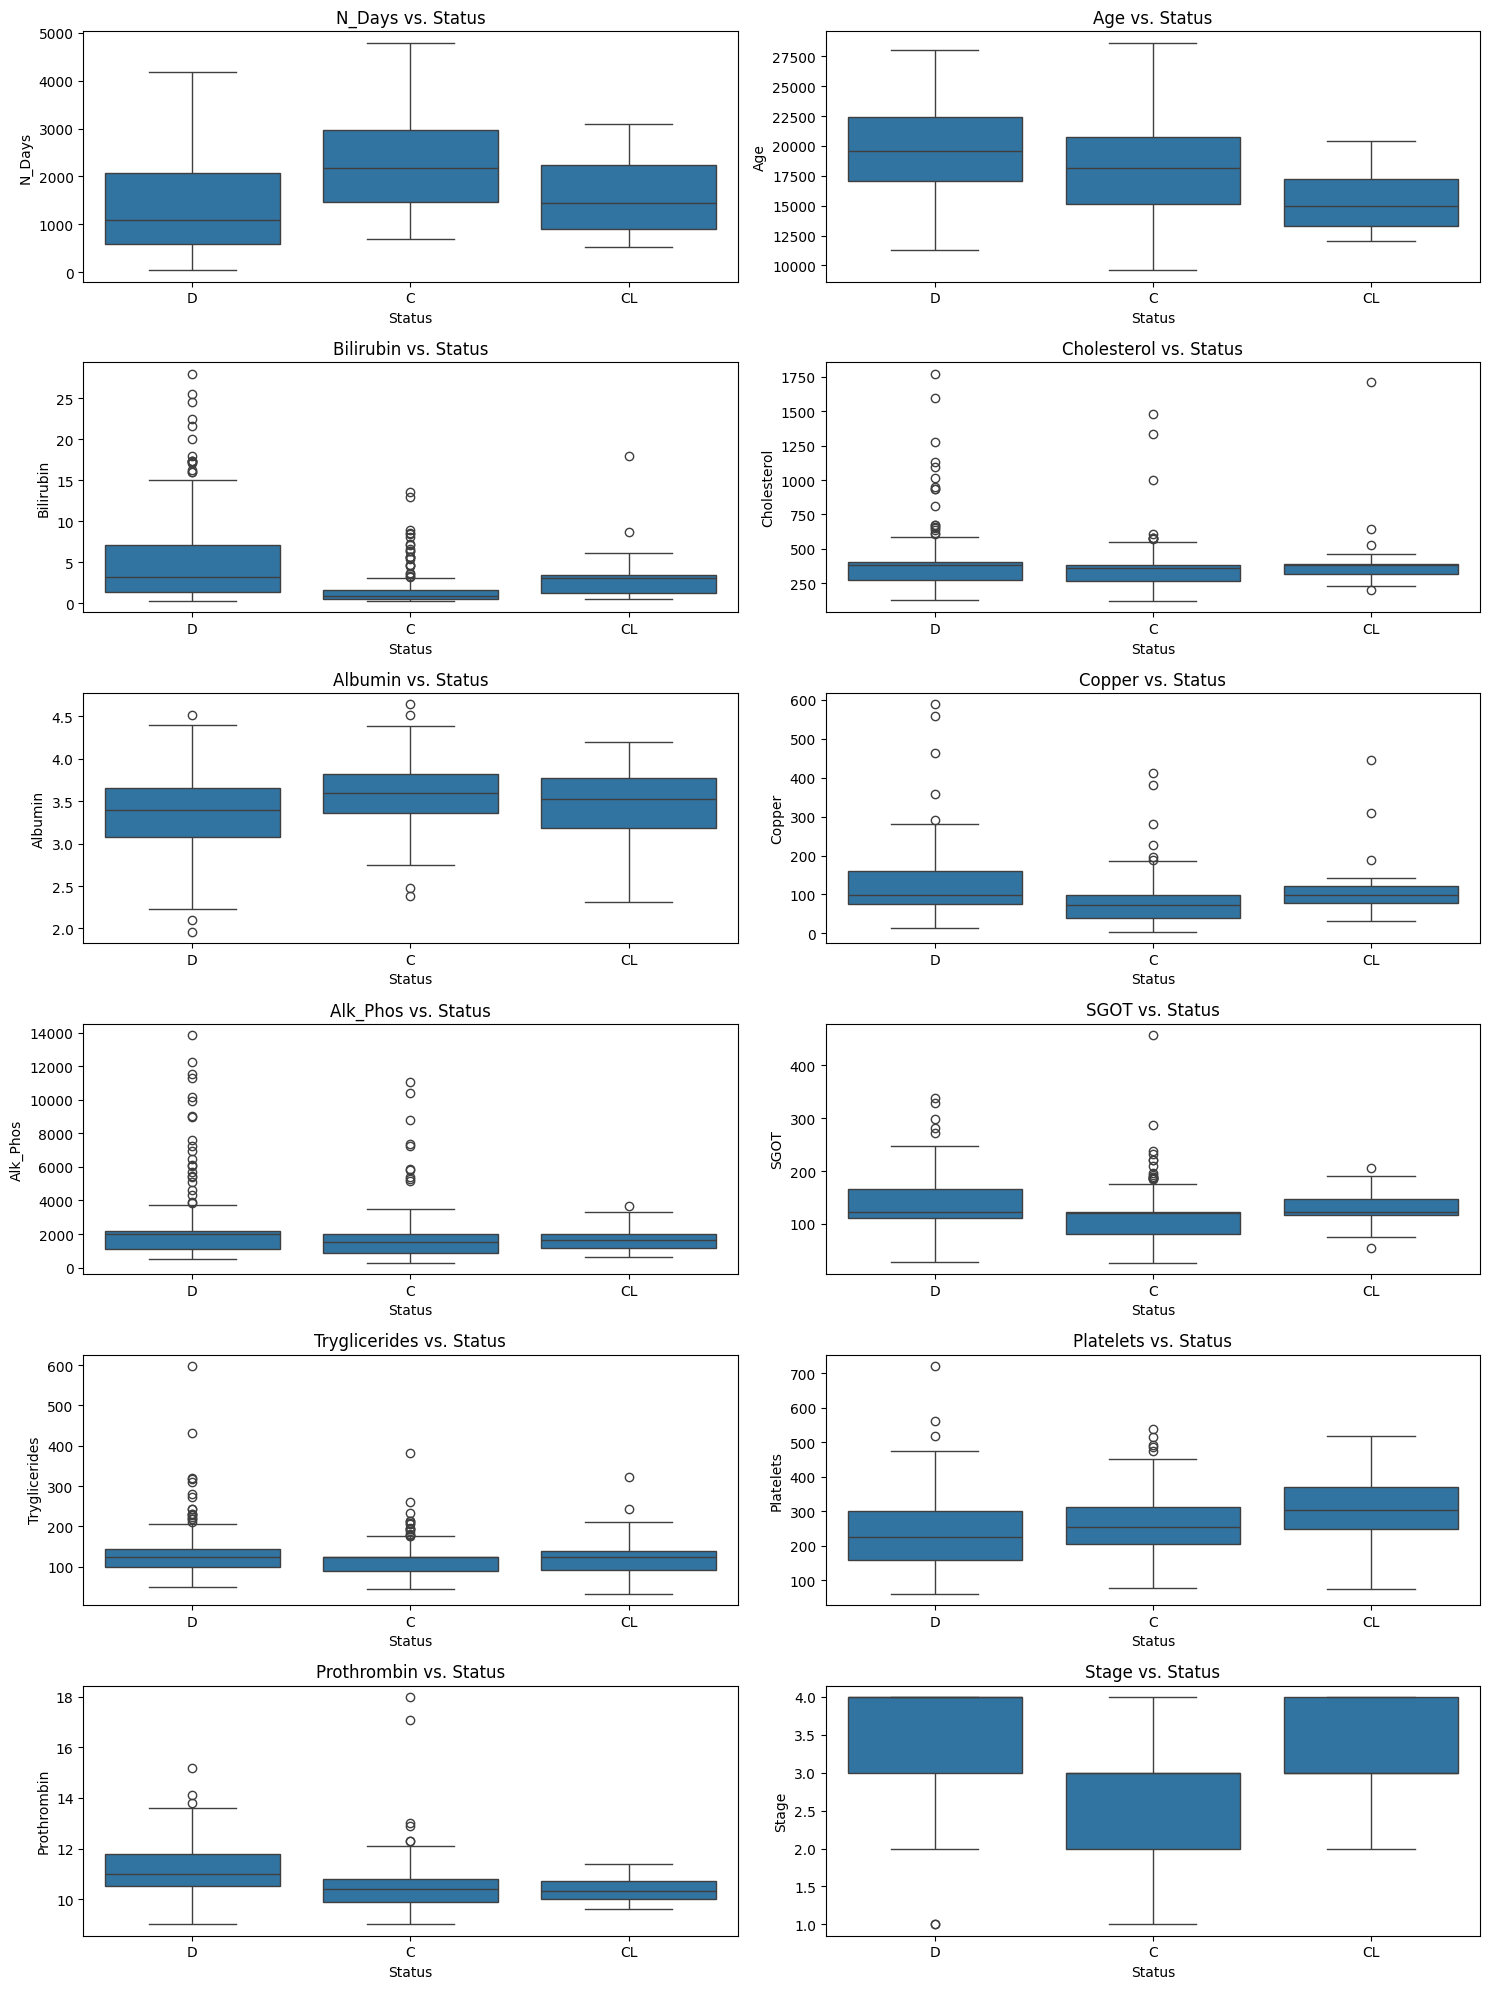

In [68]:
# List of numerical columns
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Plot box plots for numerical columns against the target variable 'Status'
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(x='Status', y=col, data=data)
    plt.title(f'{col} vs. Status')
plt.tight_layout()
plt.show()

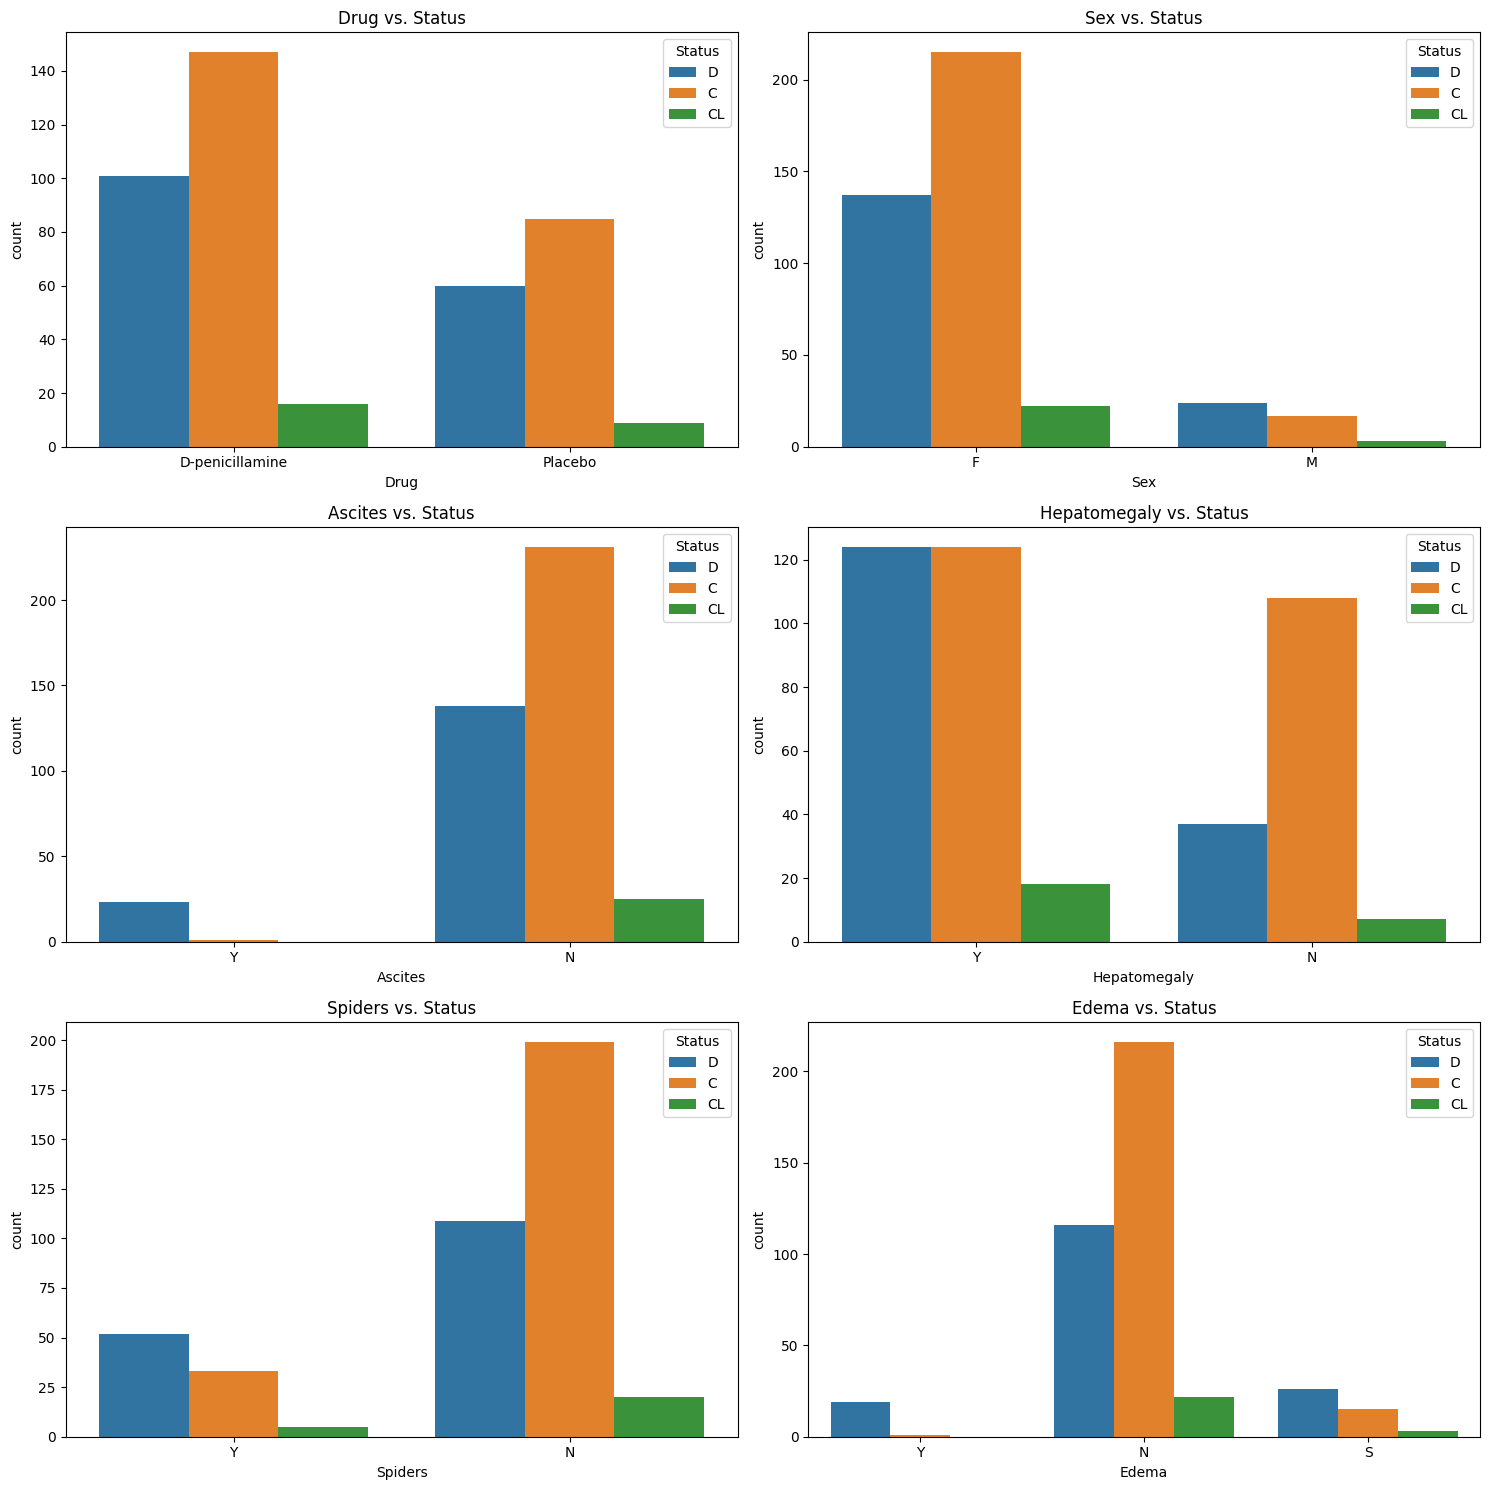

In [69]:
# List of categorical columns
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Plot count plots for categorical columns against the target variable 'Status'
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, hue='Status', data=data)
    plt.title(f'{col} vs. Status')
    plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [70]:
pip install lifelines

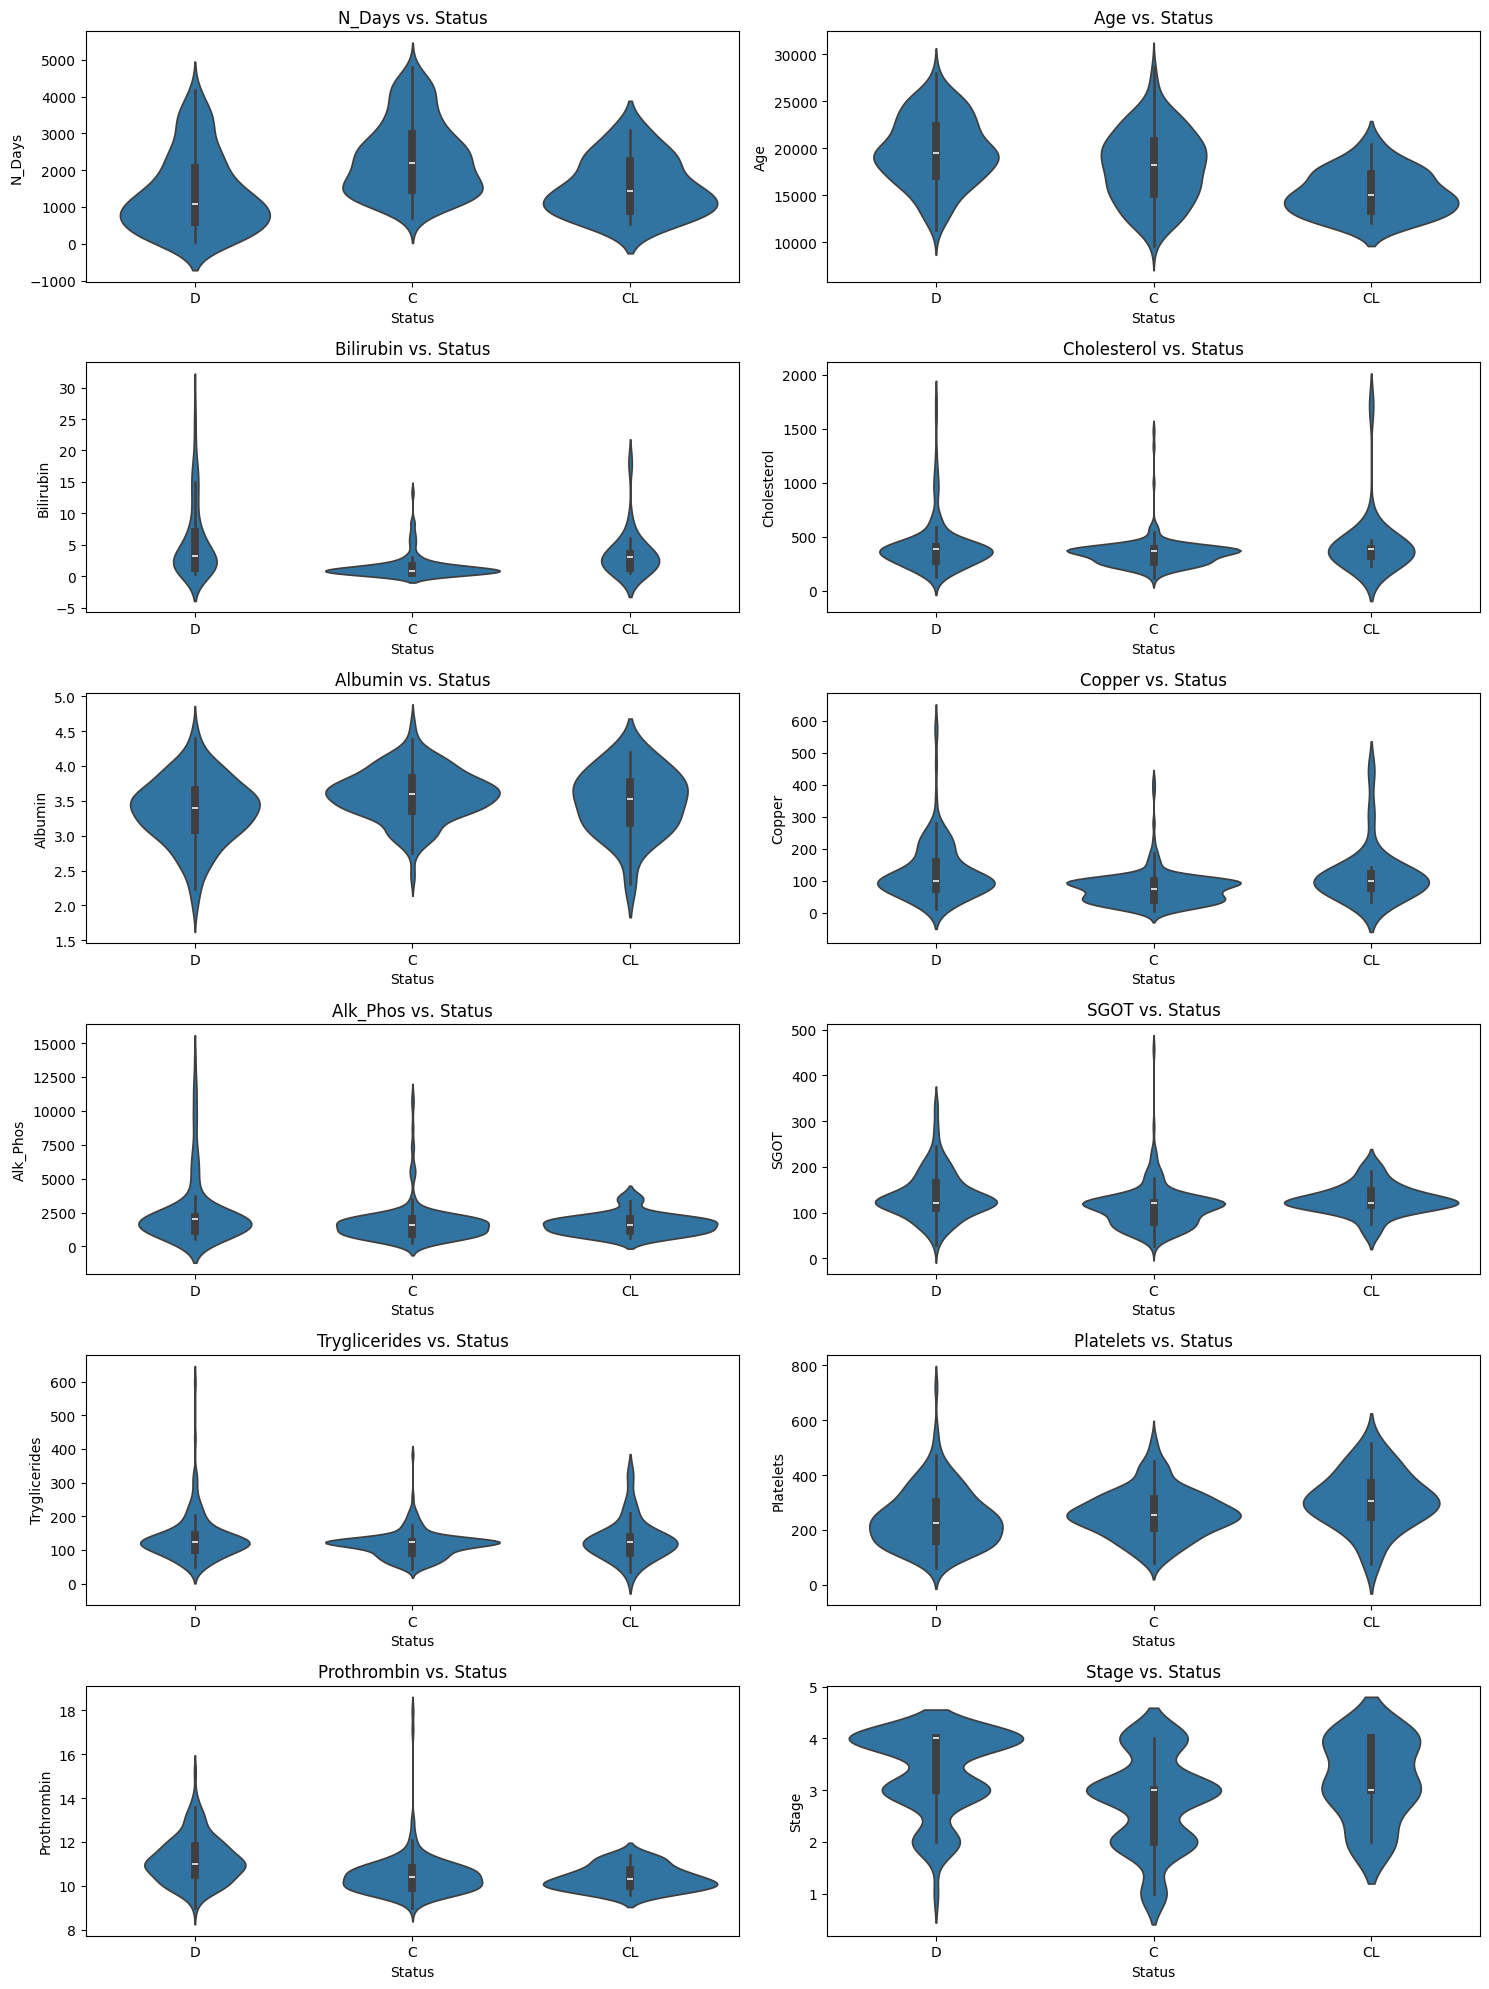

In [71]:
# Violin plots for numerical columns against Status
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1)
    sns.violinplot(x='Status', y=col, data=data)
    plt.title(f'{col} vs. Status')
plt.tight_layout()
plt.show()

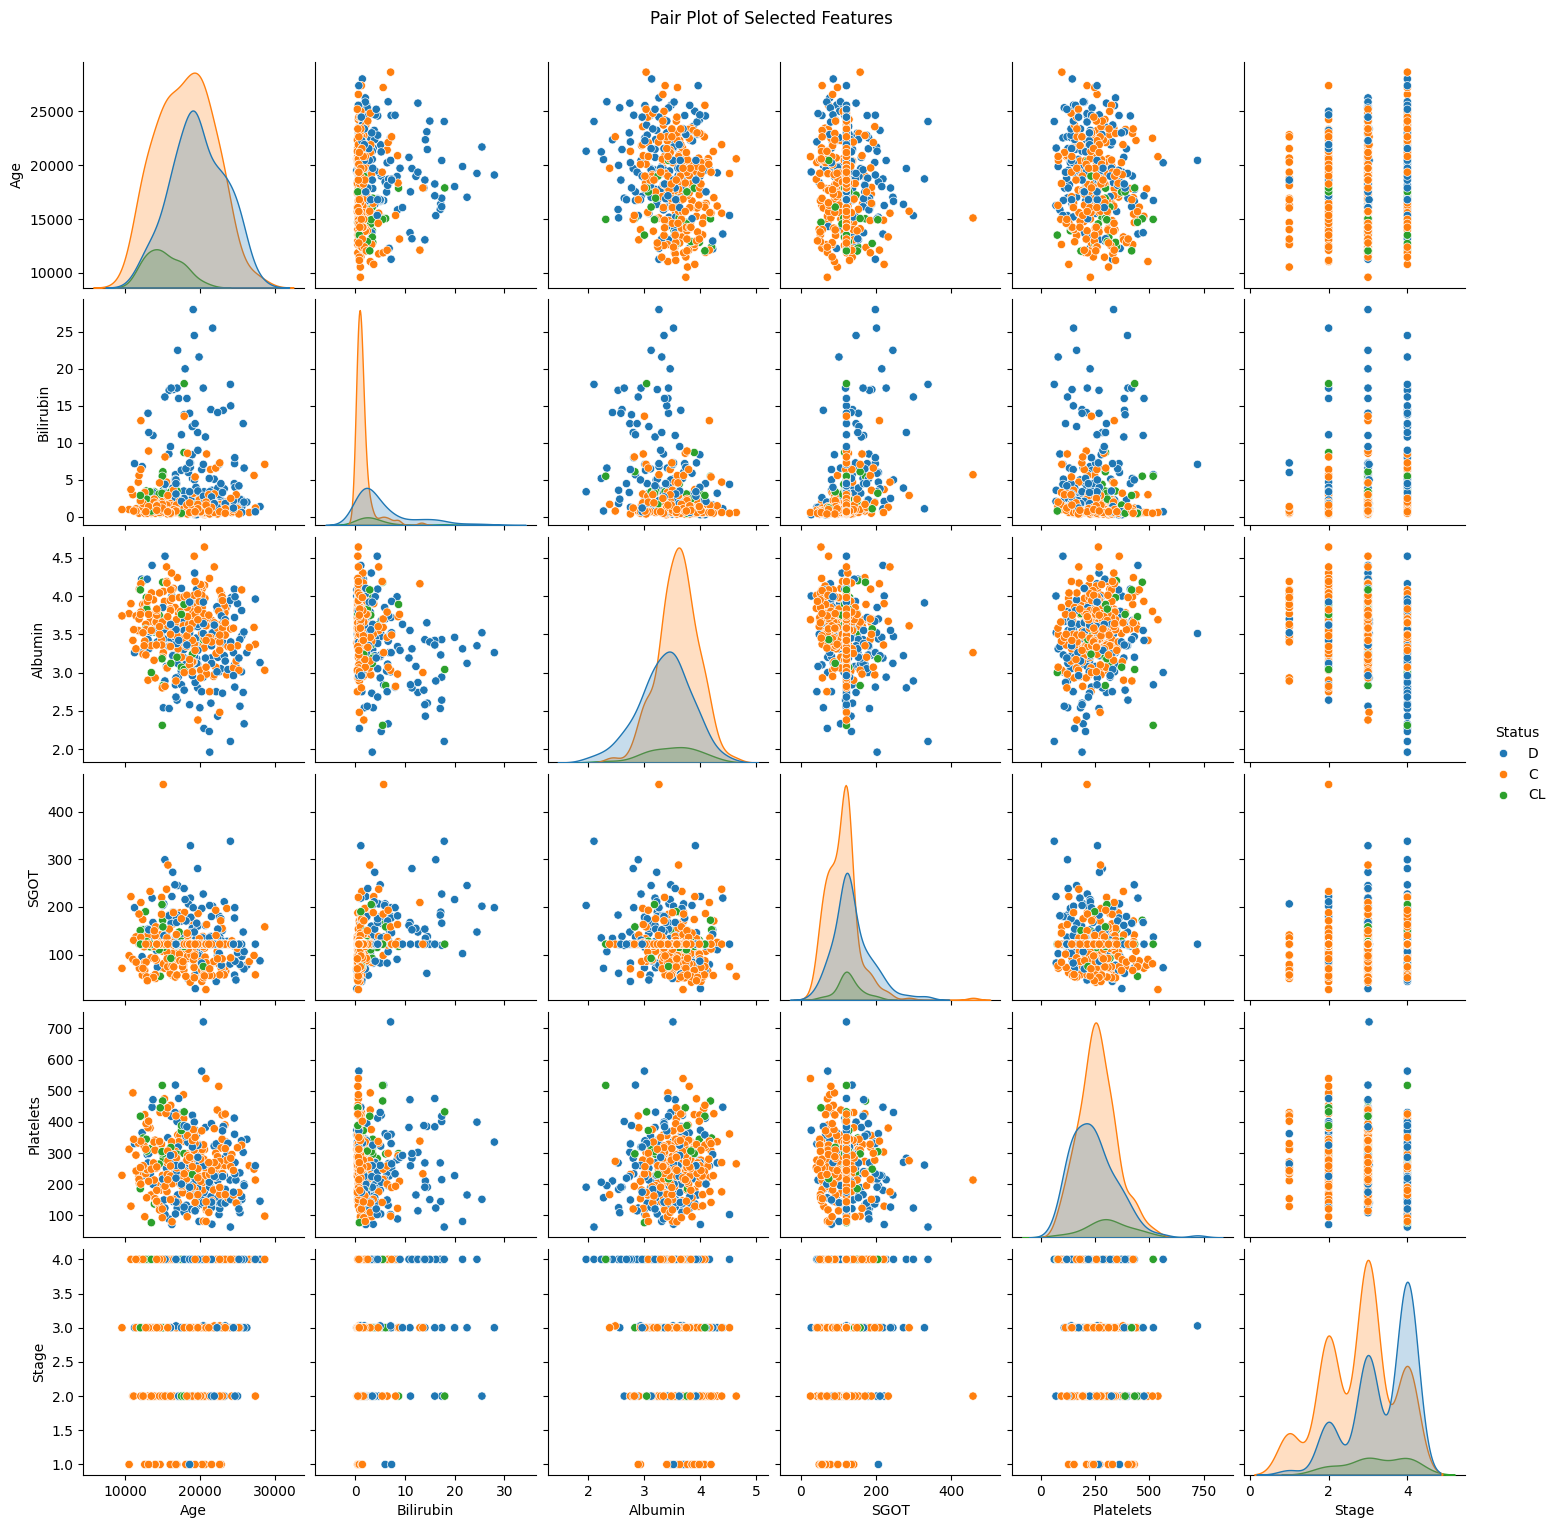

In [72]:
# Pairplot for detailed pairwise relationships colored by Status
subset_cols = ['Age', 'Bilirubin', 'Albumin', 'SGOT', 'Platelets', 'Stage']
sns.pairplot(data[subset_cols + ['Status']], hue='Status', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

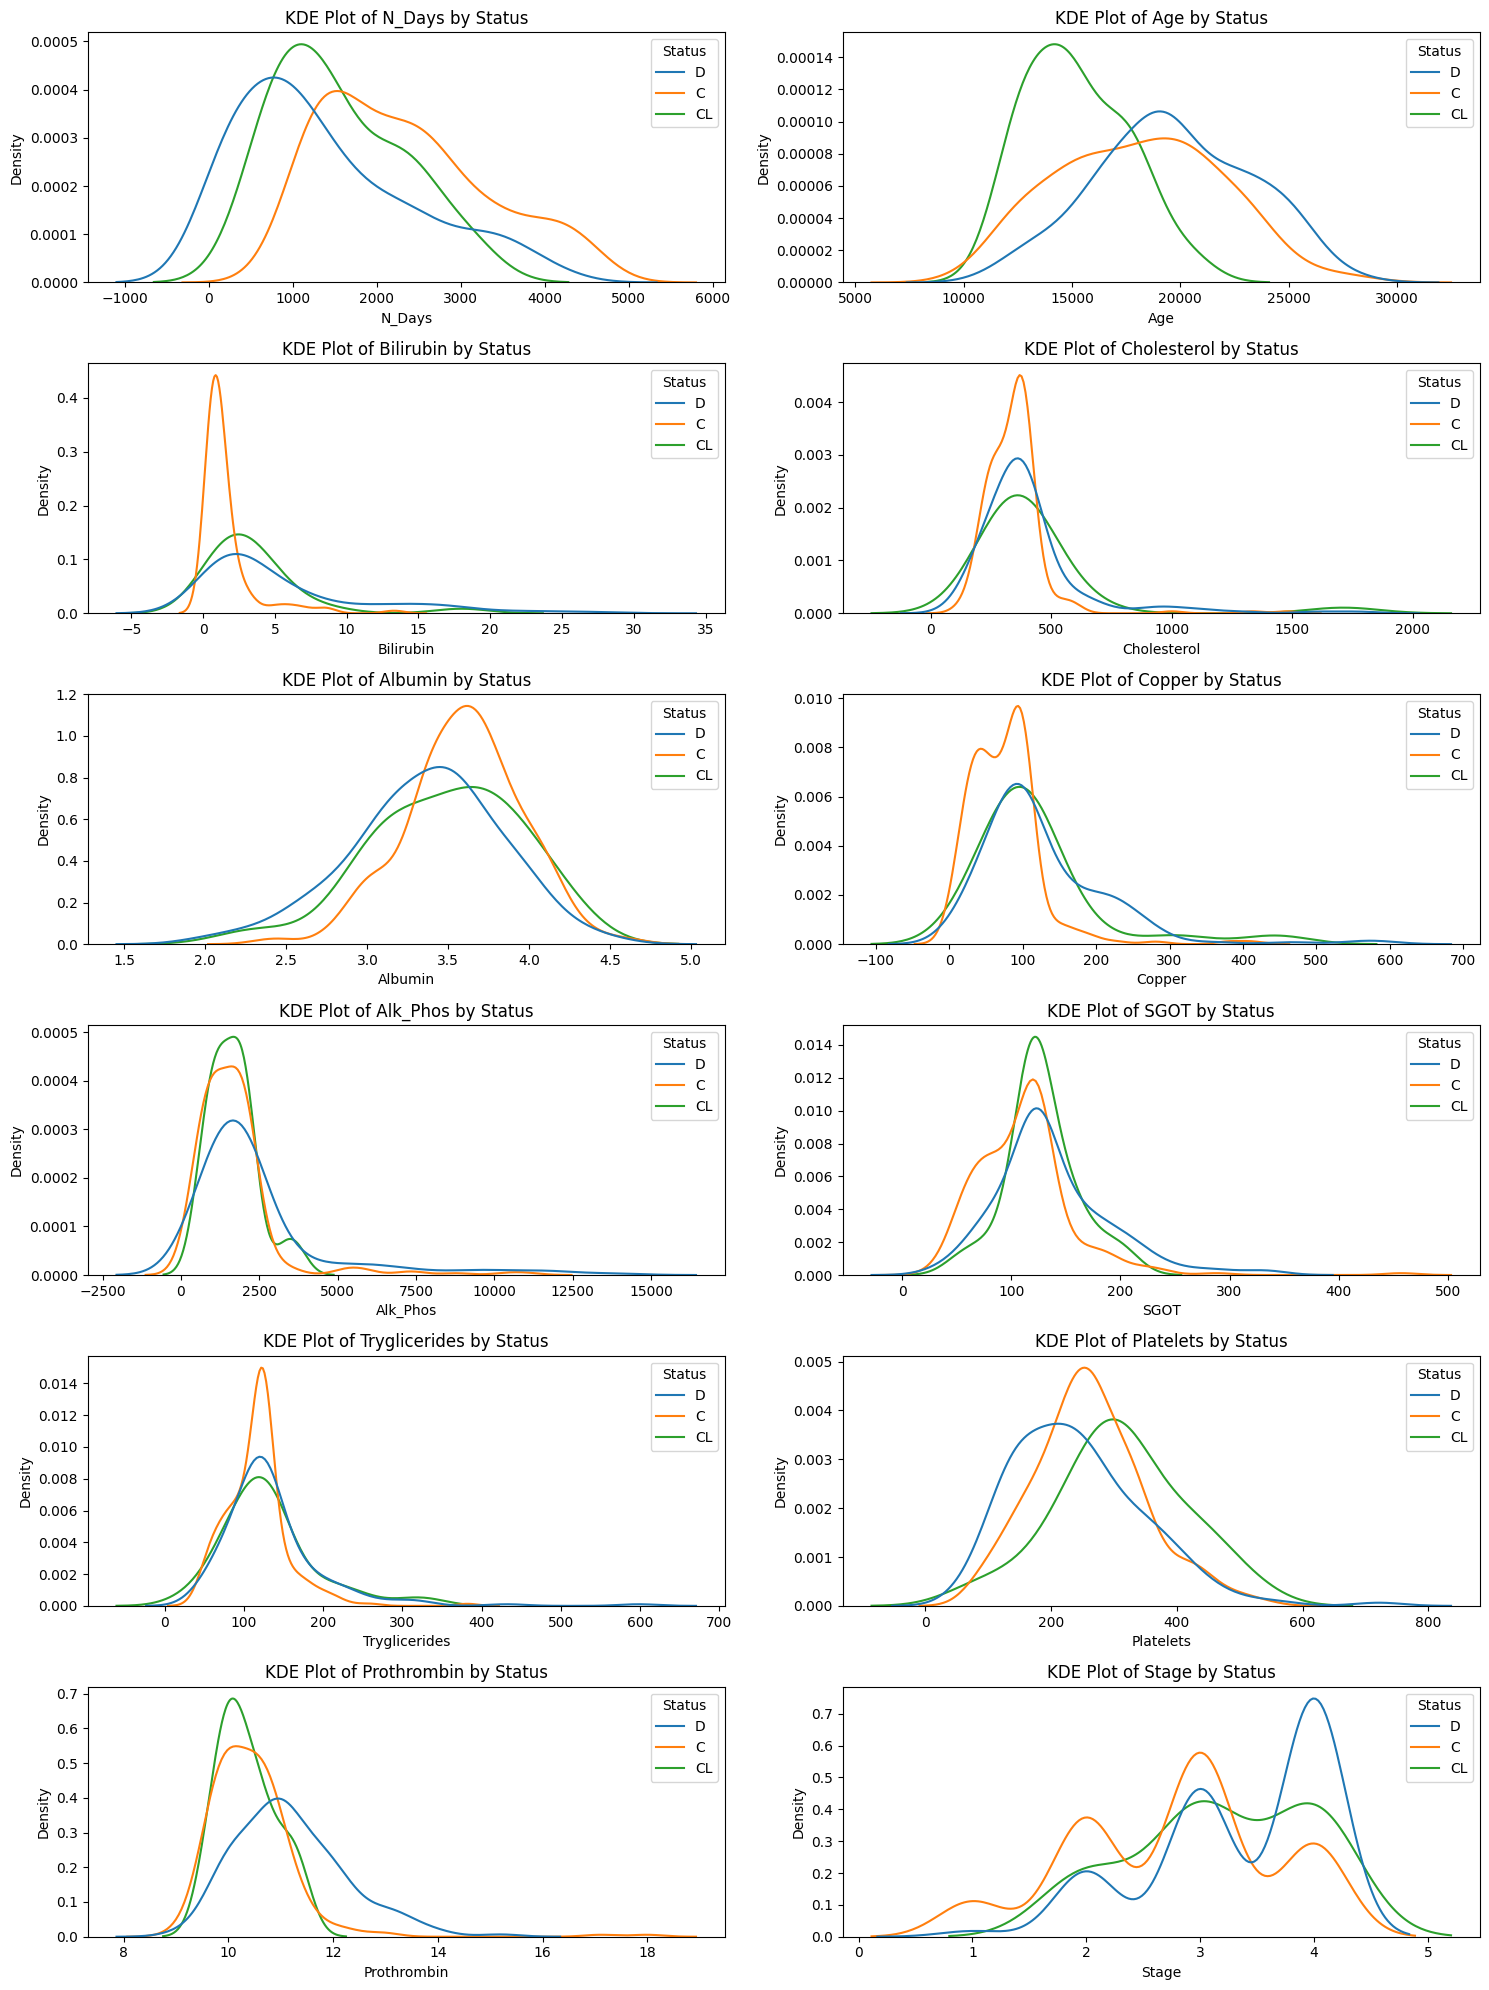

In [73]:
# KDE plots for numerical columns against Status
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1)
    sns.kdeplot(data=data, x=col, hue='Status', common_norm=False)
    plt.title(f'KDE Plot of {col} by Status')
plt.tight_layout()
plt.show()

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# List of numerical columns
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Normalize numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [75]:
# Define features and target
X = data.drop(columns=['Status'])
y = data['Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
Random Forest trained.
SVM trained.
Neural Network trained.


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# List of numerical columns
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Normalize numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features and target
X = data.drop(columns=['Status'])
y = data['Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        roc_auc = "N/A"

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'{name} Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc}')
    print('-' * 30)

# Fine-Tuning Random Forest (Assuming it performed the best)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use accuracy as the scoring metric
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.4f}')

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
else:
    roc_auc = "N/A"

# Evaluate the fine-tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Fine-Tuned Model Evaluation:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc}')

Logistic Regression trained.
Random Forest trained.
SVM trained.
Neural Network trained.
Logistic Regression Evaluation:
Accuracy: 0.7976
Precision: 0.8098
Recall: 0.7976
F1 Score: 0.7714
ROC AUC: 0.8810640693552086
------------------------------
Random Forest Evaluation:
Accuracy: 0.8095
Precision: 0.7741
Recall: 0.8095
F1 Score: 0.7875
ROC AUC: 0.8521044256803749
------------------------------
SVM Evaluation:
Accuracy: 0.6190
Precision: 0.6432
Recall: 0.6190
F1 Score: 0.5674
ROC AUC: 0.70770526229387
------------------------------
Neural Network Evaluation:
Accuracy: 0.7381
Precision: 0.7686
Recall: 0.7381
F1 Score: 0.7088
ROC AUC: 0.8515187273098667
------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8175
Fine-Tuned Model Evaluation:
Accuracy: 0.8095
Precision: 0.8224
Recall: 0.8095
F1 Score: 0.7825
ROC AUC: 0.8517653660058723

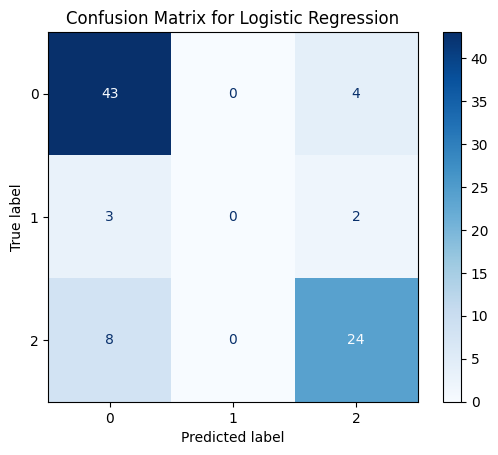

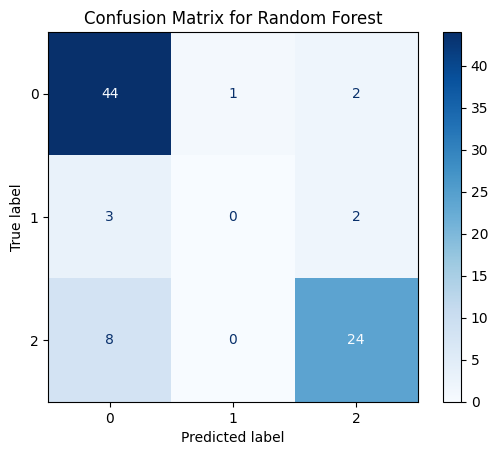

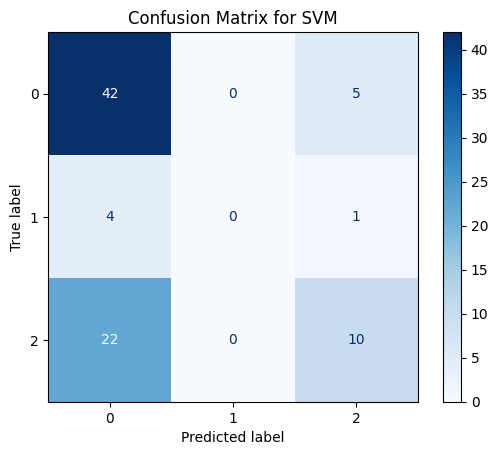

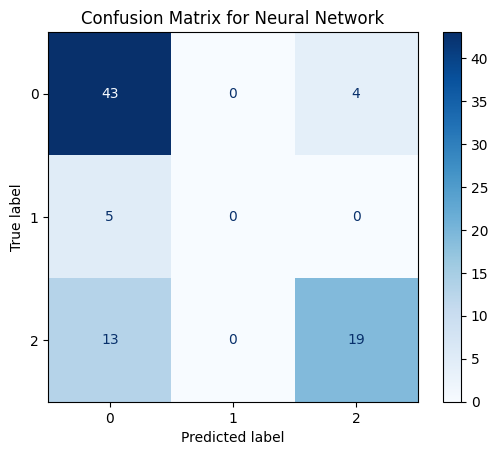

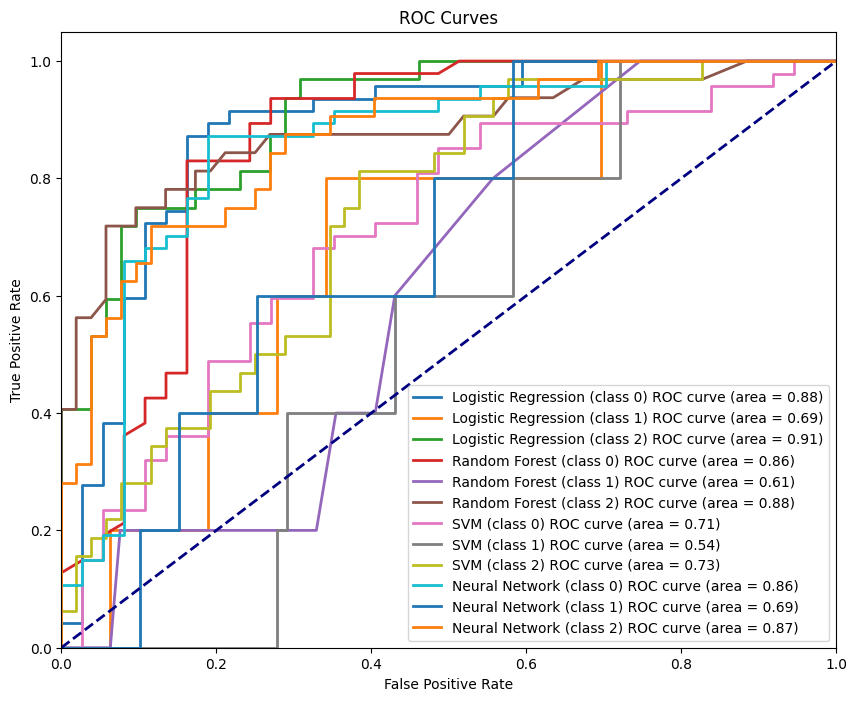

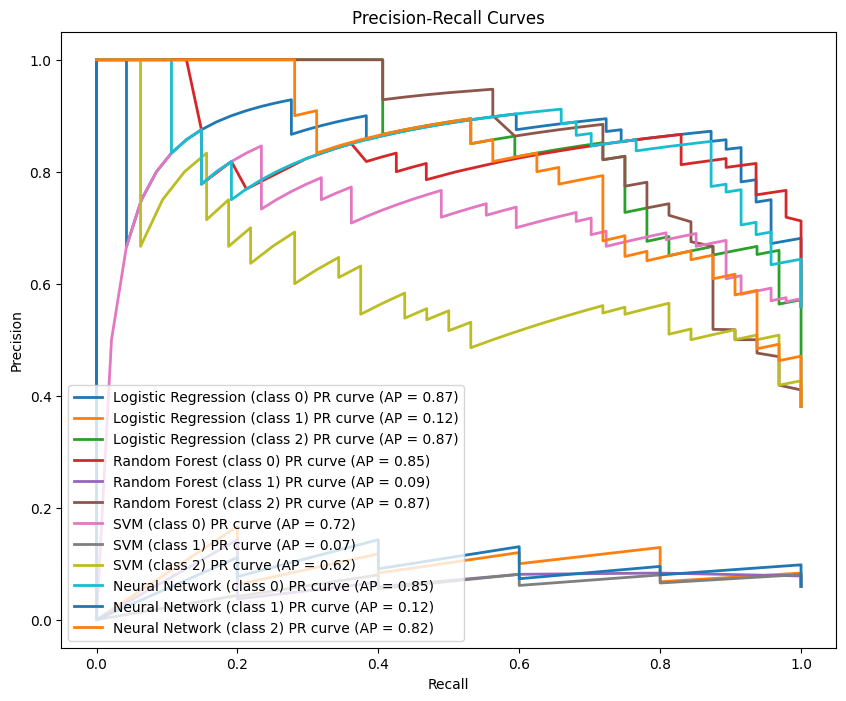

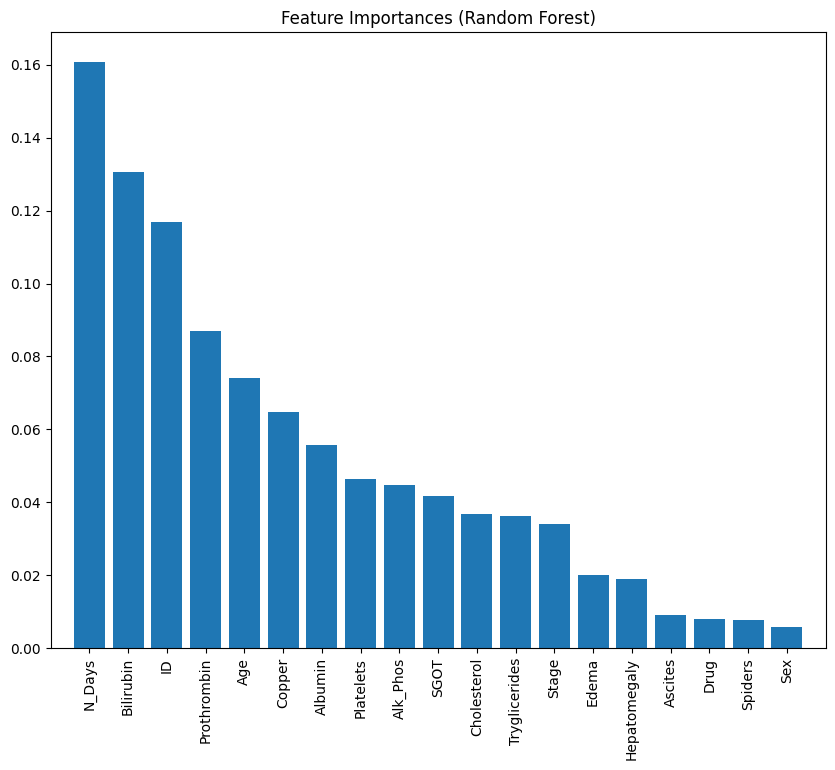

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Confusion Matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Status'].classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# ROC Curves
y_test_binarized = label_binarize(y_test, classes=range(len(label_encoders['Status'].classes_)))

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        for i in range(y_test_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (class {i}) ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        for i in range(y_test_binarized.shape[1]):
            precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
            avg_precision = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
            plt.plot(recall, precision, lw=2, label=f'{name} (class {i}) PR curve (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()

# Feature Importance (Random Forest)
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 8))
    plt.title("Feature Importances (Random Forest)")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()